📊 COVID-19 Global Data Analysis Project

🔄 Loading COVID-19 dataset...
✅ Dataset loaded successfully!
📈 Shape: (429435, 67)

🔍 DATA EXPLORATION

📋 Dataset Overview:
Shape: (429435, 67)
Columns: 67
Date range: 2020-01-01 to 2024-08-14

📊 Key Columns:
  ✅ date
  ✅ location
  ✅ total_cases
  ✅ total_deaths
  ✅ new_cases
  ✅ new_deaths
  ✅ total_vaccinations
  ✅ people_vaccinated
  ✅ people_fully_vaccinated
  ✅ population

👀 First 5 rows:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0

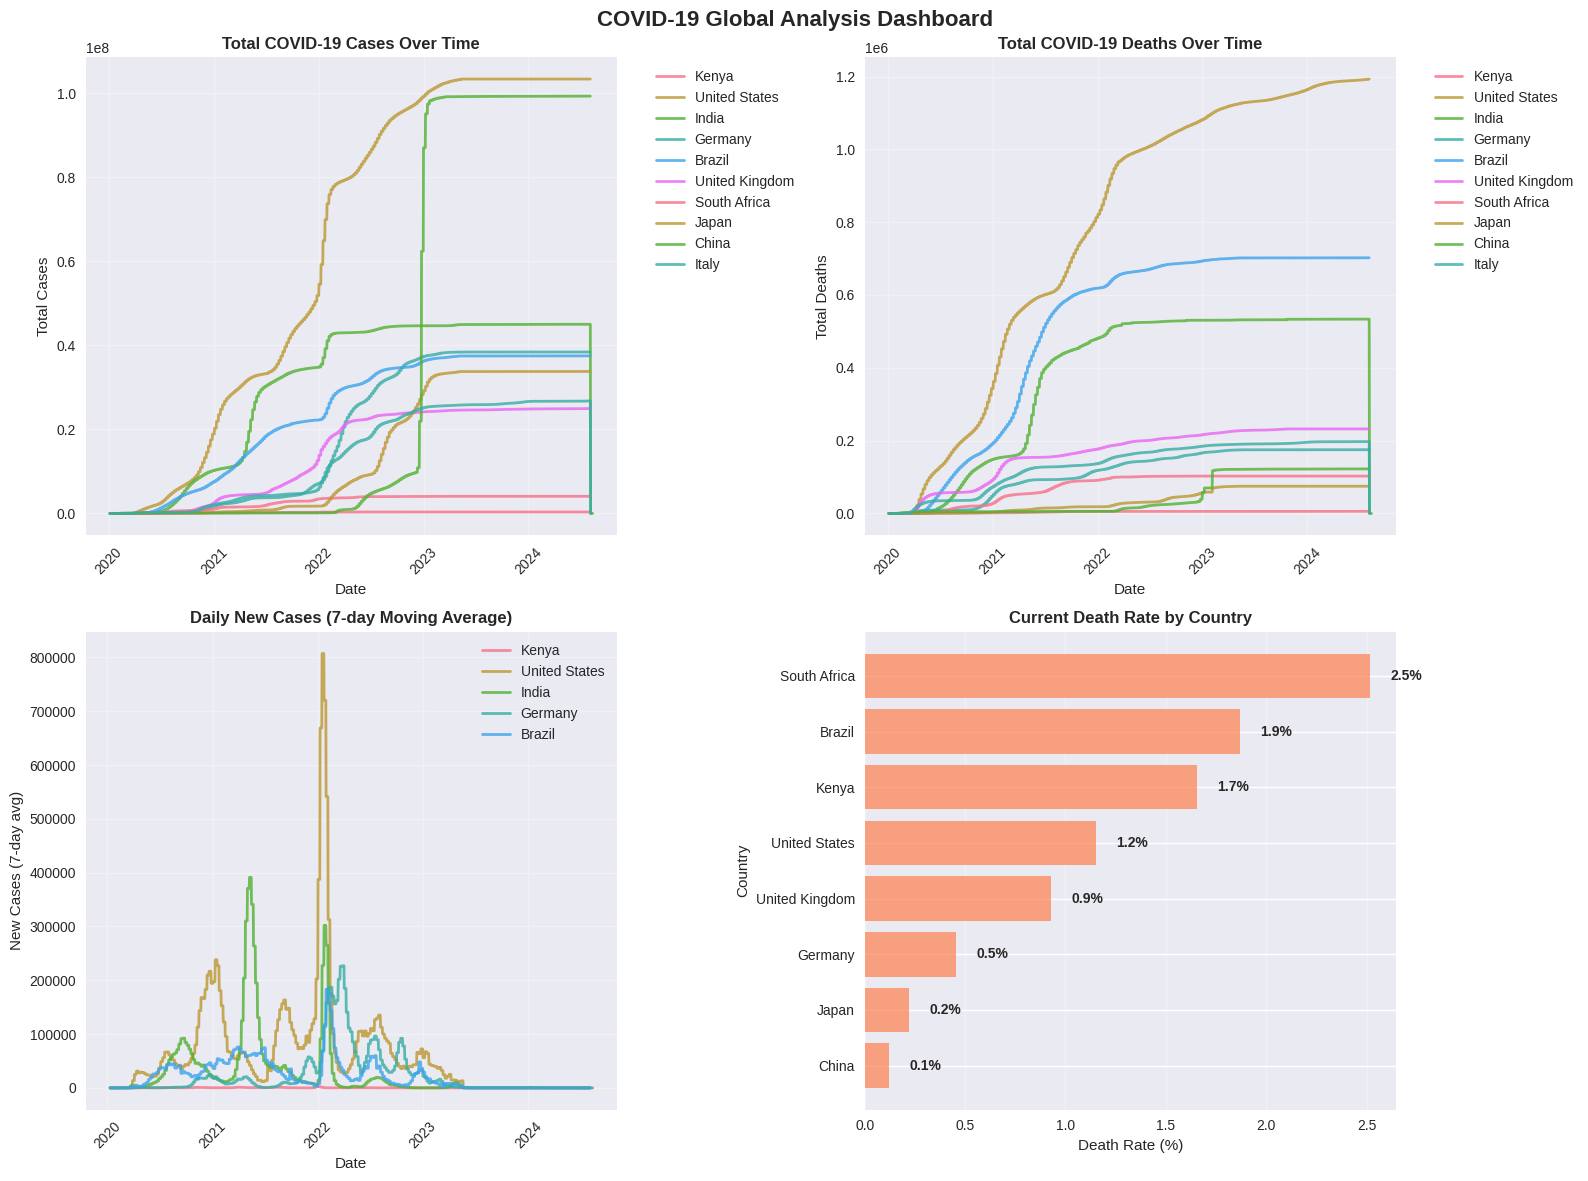


💉 VACCINATION ANALYSIS


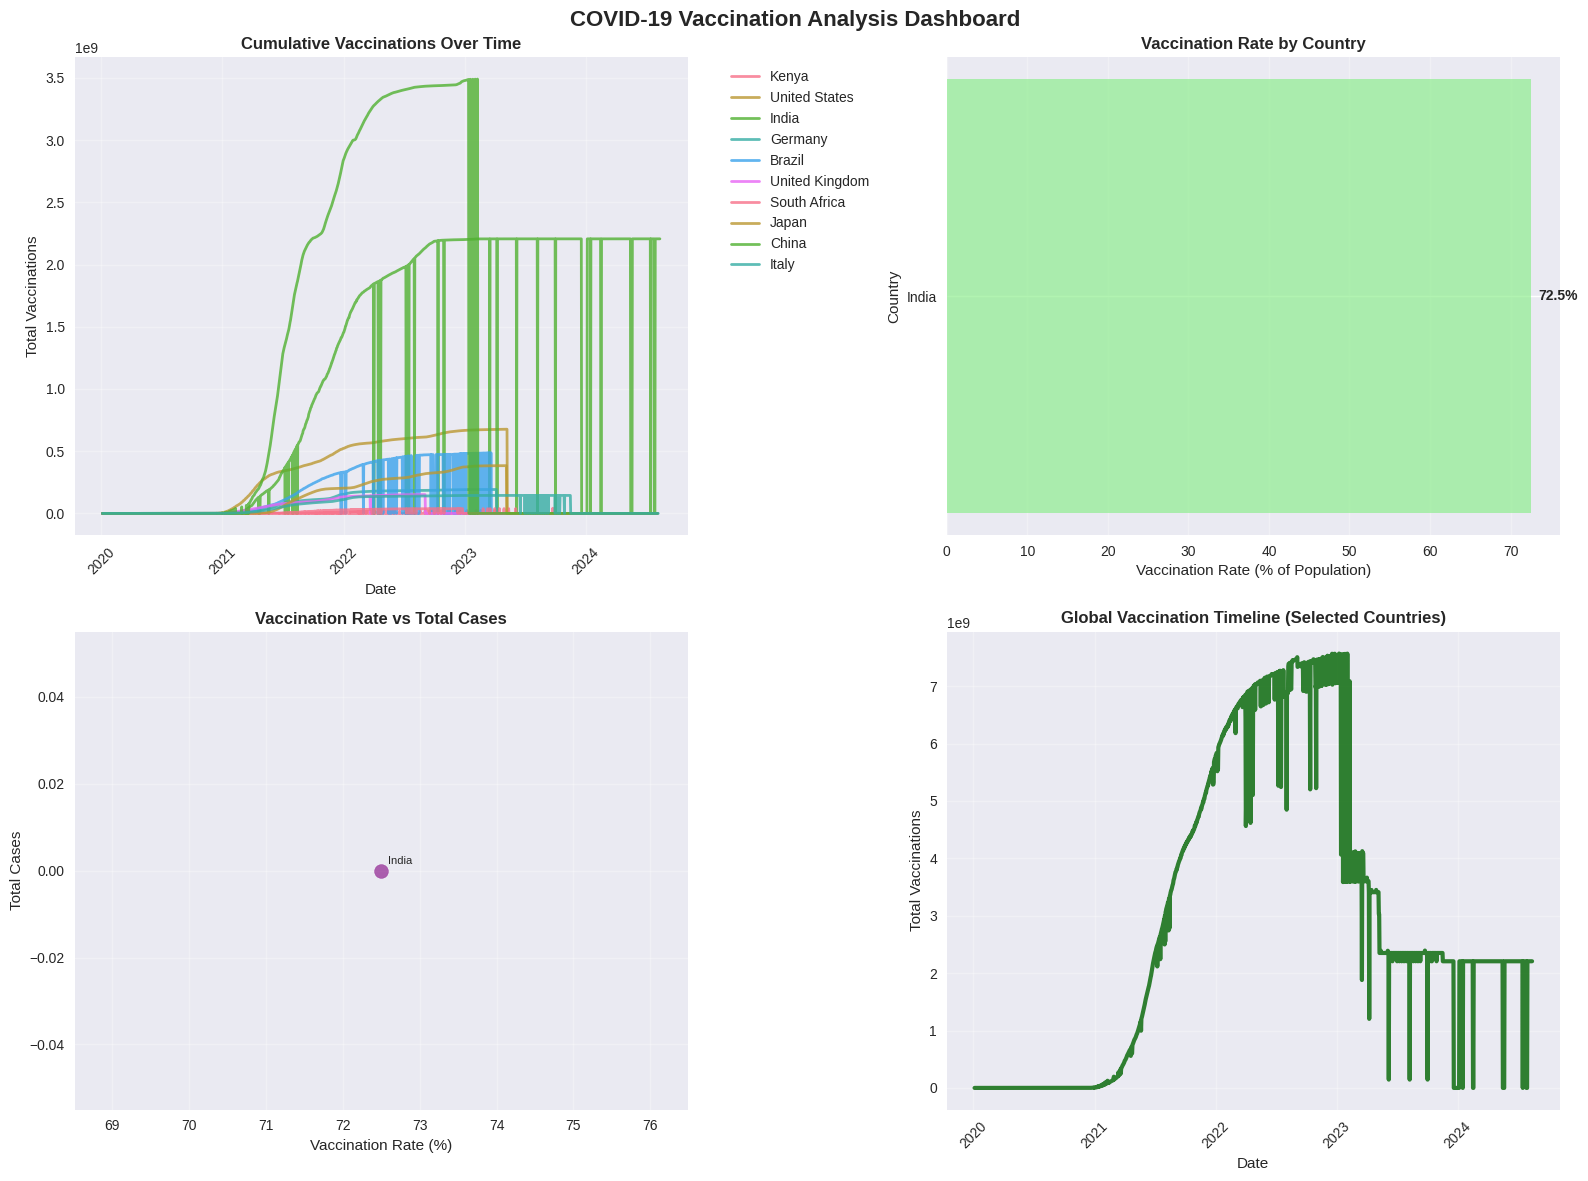


🌍 INTERACTIVE VISUALIZATIONS


ValueError: Value of 'hover_data_1' is not the name of a column in 'data_frame'. Expected one of ['location', 'iso_code', 'continent', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index', 'population', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million'] but received: vaccination_rate

In [1]:
# COVID-19 Global Data Analysis Project
# Complete Implementation Following Project Segments

# ================================
# 1️⃣ DATA COLLECTION & IMPORTS
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 COVID-19 Global Data Analysis Project")
print("=" * 50)

# Load the dataset
print("\n🔄 Loading COVID-19 dataset...")
# Download from: https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

try:
    df = pd.read_csv(url)
    print(f"✅ Dataset loaded successfully!")
    print(f"📈 Shape: {df.shape}")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("💡 Please download the CSV file manually and update the path")

# ================================
# 2️⃣ DATA EXPLORATION
# ================================

print("\n🔍 DATA EXPLORATION")
print("=" * 30)

# Basic info about the dataset
print("\n📋 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

# Display column names
print("\n📊 Key Columns:")
key_columns = ['date', 'location', 'total_cases', 'total_deaths', 'new_cases',
               'new_deaths', 'total_vaccinations', 'people_vaccinated',
               'people_fully_vaccinated', 'population']
for col in key_columns:
    if col in df.columns:
        print(f"  ✅ {col}")
    else:
        print(f"  ❌ {col} (missing)")

# Preview the data
print("\n👀 First 5 rows:")
print(df.head())

# Check for missing values
print("\n🔍 Missing Values Analysis:")
missing_data = df[key_columns].isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)
print(missing_df)

# ================================
# 3️⃣ DATA CLEANING
# ================================

print("\n🧹 DATA CLEANING")
print("=" * 25)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Remove aggregated regions (keep only countries)
exclude_locations = ['World', 'Europe', 'North America', 'South America',
                    'Asia', 'Africa', 'Oceania', 'European Union',
                    'High income', 'Upper middle income', 'Lower middle income',
                    'Low income']
df_countries = df[~df['location'].isin(exclude_locations)].copy()

# Select countries of interest for detailed analysis
countries_of_interest = ['Kenya', 'United States', 'India', 'Germany', 'Brazil',
                        'United Kingdom', 'South Africa', 'Japan', 'China', 'Italy']

df_selected = df_countries[df_countries['location'].isin(countries_of_interest)].copy()

print(f"✅ Filtered to {len(df_countries['location'].unique())} countries")
print(f"✅ Selected {len(countries_of_interest)} countries for detailed analysis")

# Handle missing values for key metrics
numeric_columns = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths',
                  'total_vaccinations', 'people_vaccinated']

for col in numeric_columns:
    if col in df_selected.columns:
        df_selected[col] = df_selected[col].fillna(0)

# Calculate additional metrics
df_selected['death_rate'] = (df_selected['total_deaths'] / df_selected['total_cases']) * 100
df_selected['vaccination_rate'] = (df_selected['people_vaccinated'] / df_selected['population']) * 100

print("✅ Data cleaning completed!")

# ================================
# 4️⃣ EXPLORATORY DATA ANALYSIS
# ================================

print("\n📈 EXPLORATORY DATA ANALYSIS")
print("=" * 35)

# Set up the plotting environment
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COVID-19 Global Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Total Cases Over Time
ax1 = axes[0, 0]
for country in countries_of_interest:
    country_data = df_selected[df_selected['location'] == country]
    if not country_data.empty:
        ax1.plot(country_data['date'], country_data['total_cases'],
                label=country, linewidth=2, alpha=0.8)

ax1.set_title('Total COVID-19 Cases Over Time', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Total Deaths Over Time
ax2 = axes[0, 1]
for country in countries_of_interest:
    country_data = df_selected[df_selected['location'] == country]
    if not country_data.empty:
        ax2.plot(country_data['date'], country_data['total_deaths'],
                label=country, linewidth=2, alpha=0.8)

ax2.set_title('Total COVID-19 Deaths Over Time', fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Daily New Cases (7-day moving average)
ax3 = axes[1, 0]
for country in countries_of_interest[:5]:  # Show top 5 for clarity
    country_data = df_selected[df_selected['location'] == country].copy()
    if not country_data.empty:
        country_data['new_cases_7day'] = country_data['new_cases'].rolling(window=7).mean()
        ax3.plot(country_data['date'], country_data['new_cases_7day'],
                label=country, linewidth=2, alpha=0.8)

ax3.set_title('Daily New Cases (7-day Moving Average)', fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('New Cases (7-day avg)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Current Death Rate by Country
ax4 = axes[1, 1]
latest_data = df_selected.groupby('location').last().reset_index()
latest_data = latest_data[latest_data['total_cases'] > 1000]  # Filter for significant case numbers
latest_data = latest_data.sort_values('death_rate', ascending=True)

bars = ax4.barh(latest_data['location'], latest_data['death_rate'],
                color='coral', alpha=0.7)
ax4.set_title('Current Death Rate by Country', fontweight='bold')
ax4.set_xlabel('Death Rate (%)')
ax4.set_ylabel('Country')
ax4.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax4.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ================================
# 5️⃣ VACCINATION ANALYSIS
# ================================

print("\n💉 VACCINATION ANALYSIS")
print("=" * 30)

# Create vaccination dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COVID-19 Vaccination Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Cumulative Vaccinations Over Time
ax1 = axes[0, 0]
for country in countries_of_interest:
    country_data = df_selected[df_selected['location'] == country]
    if not country_data.empty and 'total_vaccinations' in country_data.columns:
        ax1.plot(country_data['date'], country_data['total_vaccinations'],
                label=country, linewidth=2, alpha=0.8)

ax1.set_title('Cumulative Vaccinations Over Time', fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Vaccinations')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Vaccination Rate by Country
ax2 = axes[0, 1]
latest_vax = df_selected.groupby('location').last().reset_index()
latest_vax = latest_vax[latest_vax['vaccination_rate'] > 0]
latest_vax = latest_vax.sort_values('vaccination_rate', ascending=True)

bars = ax2.barh(latest_vax['location'], latest_vax['vaccination_rate'],
                color='lightgreen', alpha=0.7)
ax2.set_title('Vaccination Rate by Country', fontweight='bold')
ax2.set_xlabel('Vaccination Rate (% of Population)')
ax2.set_ylabel('Country')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

# 3. Vaccination vs Cases Correlation
ax3 = axes[1, 0]
correlation_data = latest_vax[['vaccination_rate', 'total_cases', 'location']].copy()
correlation_data = correlation_data.dropna()

scatter = ax3.scatter(correlation_data['vaccination_rate'],
                     correlation_data['total_cases'],
                     alpha=0.6, s=100, c='purple')
ax3.set_title('Vaccination Rate vs Total Cases', fontweight='bold')
ax3.set_xlabel('Vaccination Rate (%)')
ax3.set_ylabel('Total Cases')
ax3.grid(True, alpha=0.3)

# Add country labels
for i, row in correlation_data.iterrows():
    ax3.annotate(row['location'], (row['vaccination_rate'], row['total_cases']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# 4. Timeline of Vaccination Rollout
ax4 = axes[1, 1]
vax_timeline = df_selected.groupby('date')['total_vaccinations'].sum().reset_index()
ax4.plot(vax_timeline['date'], vax_timeline['total_vaccinations'],
         color='darkgreen', linewidth=3, alpha=0.8)
ax4.set_title('Global Vaccination Timeline (Selected Countries)', fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Total Vaccinations')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ================================
# 6️⃣ INTERACTIVE VISUALIZATIONS
# ================================

print("\n🌍 INTERACTIVE VISUALIZATIONS")
print("=" * 35)

# Create interactive choropleth map
latest_global = df_countries.groupby('location').last().reset_index()
latest_global = latest_global[latest_global['total_cases'] > 100]

# Interactive world map showing total cases
fig_map = px.choropleth(
    latest_global,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    hover_data=['total_deaths', 'vaccination_rate'],
    color_continuous_scale='Reds',
    title='COVID-19 Total Cases by Country (Latest Data)',
    labels={'total_cases': 'Total Cases'}
)

fig_map.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5,
    width=1000,
    height=600
)

fig_map.show()

# Interactive time series for selected countries
fig_interactive = px.line(
    df_selected,
    x='date',
    y='total_cases',
    color='location',
    title='Interactive COVID-19 Cases Timeline',
    labels={'total_cases': 'Total Cases', 'date': 'Date'},
    line_shape='linear'
)

fig_interactive.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Cases',
    hovermode='x unified',
    width=1000,
    height=500
)

fig_interactive.show()

# ================================
# 7️⃣ INSIGHTS & REPORTING
# ================================

print("\n📊 KEY INSIGHTS & FINDINGS")
print("=" * 35)

# Generate key statistics
total_cases_global = df_countries['total_cases'].max()
total_deaths_global = df_countries['total_deaths'].max()
countries_analyzed = len(df_countries['location'].unique())

print(f"\n🌍 GLOBAL STATISTICS:")
print(f"  • Total Countries Analyzed: {countries_analyzed}")
print(f"  • Latest Global Cases: {total_cases_global:,}")
print(f"  • Latest Global Deaths: {total_deaths_global:,}")

print(f"\n🔍 KEY INSIGHTS:")

# Insight 1: Highest case numbers
top_cases = latest_global.nlargest(3, 'total_cases')
print(f"  1️⃣ Countries with highest total cases:")
for i, row in top_cases.iterrows():
    print(f"     • {row['location']}: {row['total_cases']:,} cases")

# Insight 2: Highest death rates
top_death_rates = latest_global.nlargest(3, 'death_rate')
print(f"  2️⃣ Countries with highest death rates:")
for i, row in top_death_rates.iterrows():
    if pd.notna(row['death_rate']):
        print(f"     • {row['location']}: {row['death_rate']:.2f}%")

# Insight 3: Vaccination leaders
top_vax = latest_global.nlargest(3, 'vaccination_rate')
print(f"  3️⃣ Vaccination leaders:")
for i, row in top_vax.iterrows():
    if pd.notna(row['vaccination_rate']):
        print(f"     • {row['location']}: {row['vaccination_rate']:.1f}% vaccinated")

# Insight 4: Trends analysis
latest_month = df_selected[df_selected['date'] >= (df_selected['date'].max() - pd.Timedelta(days=30))]
avg_new_cases = latest_month.groupby('location')['new_cases'].mean().sort_values(ascending=False)
print(f"  4️⃣ Countries with highest average daily new cases (last 30 days):")
for country, cases in avg_new_cases.head(3).items():
    print(f"     • {country}: {cases:.0f} cases/day")

# Insight 5: Regional patterns
print(f"  5️⃣ Data Quality Observations:")
print(f"     • Dataset spans from {df['date'].min()} to {df['date'].max()}")
print(f"     • Vaccination data available for {len(latest_global[latest_global['vaccination_rate'] > 0])} countries")
print(f"     • Most complete data available for developed nations")

print(f"\n📈 RECOMMENDATIONS FOR FURTHER ANALYSIS:")
print(f"  • Analyze seasonal patterns in case numbers")
print(f"  • Study correlation between vaccination rates and case reduction")
print(f"  • Investigate economic factors affecting pandemic response")
print(f"  • Compare policy effectiveness across different countries")

print(f"\n✅ ANALYSIS COMPLETE!")
print(f"This notebook provides a comprehensive analysis of COVID-19 global data")
print(f"following the structured approach outlined in your project objectives.")